# Food Demand Forecasting

There is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. Demand forecasting for upcoming weeks will be helpful so that these centers will plan the stock of raw materials accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the training and testing csv files,merging it with fulfillment center and meal_info. Then check for null values.

In [2]:
df_train= pd.read_csv("D:/data science classes/food demand forecasting project/train_GzS76OK/train.csv")
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:
df_test= pd.read_csv("D:/data science classes/food demand forecasting project/test_QoiMO9B.csv")
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [4]:
df_fulfill= pd.read_csv("D:/data science classes/food demand forecasting project/train_GzS76OK/fulfilment_center_info.csv")
df_fulfill.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df_meal= pd.read_csv("D:/data science classes/food demand forecasting project/train_GzS76OK/meal_info.csv")
df_meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
df_train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
df_test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [9]:
df_fulfill.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [10]:
df_meal.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

In [11]:
df_train= pd.merge(df_train,df_fulfill,on='center_id')
df_train= pd.merge(df_train,df_meal,on='meal_id')

In [12]:
df_test= pd.merge(df_test,df_fulfill,on='center_id')
df_test= pd.merge(df_test,df_meal,on='meal_id')

In [13]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


Plotting various graphs to have a clear insight of the data, understanding how the features are related and detecting the outliers.

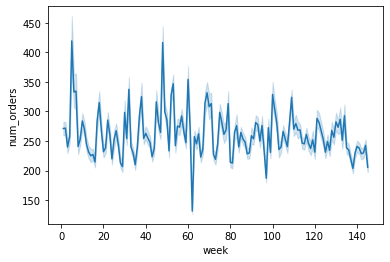

In [14]:
sns.lineplot(df_train['week'],df_train['num_orders'])

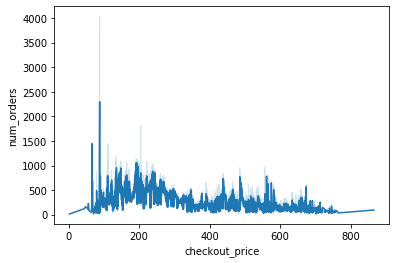

In [15]:
sns.lineplot(df_train['checkout_price'],df_train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

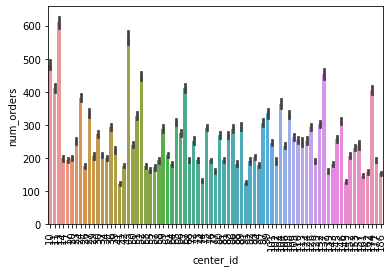

In [16]:
sns.barplot(df_train['center_id'],df_train['num_orders'])
plt.xticks(rotation='90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

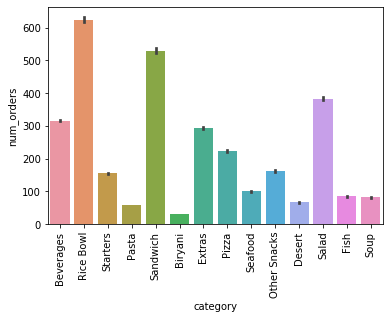

In [17]:
sns.barplot(df_train['category'],df_train['num_orders'])
plt.xticks(rotation='90')

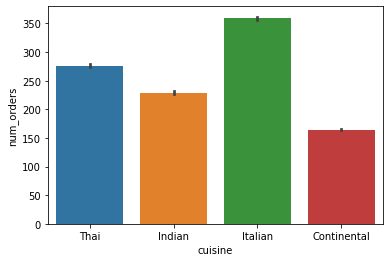

In [18]:
sns.barplot(df_train['cuisine'],df_train['num_orders'])

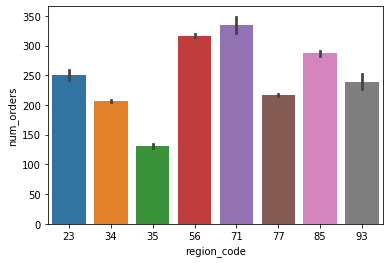

In [19]:
sns.barplot(df_train['region_code'],df_train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

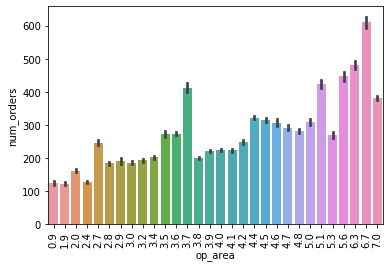

In [20]:
sns.barplot(df_train['op_area'],df_train['num_orders'])
plt.xticks(rotation='90')

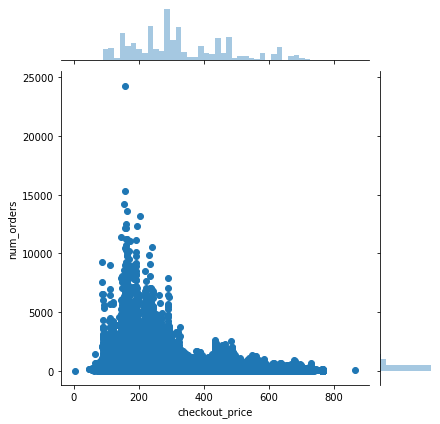

In [21]:
sns.jointplot(x='checkout_price',y='num_orders',data=df_train)

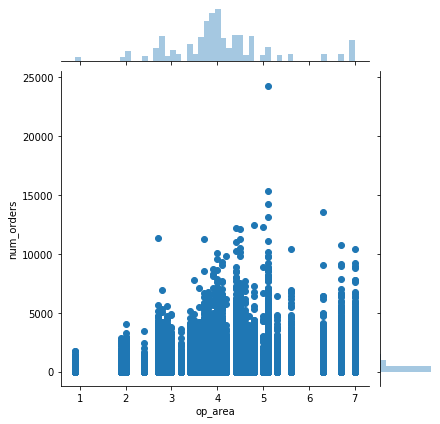

In [22]:
sns.jointplot(x='op_area',y='num_orders',data=df_train)

Mapping the differnt string values in training and testing set, the choose the dependent variable(y) and independent variables(X)

In [23]:
total_data= [df_train,df_test]
for dataset in total_data:
    dataset['category']= dataset['category'].map({'Beverages':1,'Rice Bowl':2,'Starters':3,'Pasta':4,'Sandwich':5,'Biryani':6,'Extras':7,'Pizza':8,'Seafood':9,'Other Snacks':10,'Desert':11,'Salad':12,'Fish':13,'Soup':14})
    dataset['cuisine']= dataset['cuisine'].map({'Thai':1,'Indian':2,'Italian':3,'Continental':4})
    dataset['center_type']= dataset['center_type'].map({'TYPE_A':1,'TYPE_B':2,'TYPE_C':3})

In [24]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,3,2.0,1,1
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,3,2.0,1,1
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,3,2.0,1,1
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,3,2.0,1,1
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,3,2.0,1,1


In [25]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,3,2.0,1,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,3,2.0,1,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,3,2.0,1,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,3,2.0,1,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,3,2.0,1,1


In [26]:
X= df_train.drop('num_orders',axis=1)
y= df_train['num_orders']

In [27]:
X.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,647,56,3,2.0,1,1
1,1018704,2,55,1885,135.83,152.29,0,0,647,56,3,2.0,1,1
2,1196273,3,55,1885,132.92,133.92,0,0,647,56,3,2.0,1,1
3,1116527,4,55,1885,135.86,134.86,0,0,647,56,3,2.0,1,1
4,1343872,5,55,1885,146.50,147.50,0,0,647,56,3,2.0,1,1


Spilitting the dataset for training and testing, then by using different machine learning algorithms to predict and comapre the model accuracy score.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=21)

In [29]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model.score(X_test, y_test)

0.24936337235725514

In [30]:
y_pred= regression_model.predict(X_test)
y_pred

array([138.7857279 , 112.00120616, 229.98256208, ..., 331.46434306,
        50.6209092 , 514.39012192])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.025167013470594676

In [32]:
import xgboost

In [33]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.56, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.56, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.8298254972985608


In [35]:
predictions = xgb.predict(X_test)
predictions

array([252.33014 ,  72.768326, 168.3868  , ..., 249.15503 ,  47.890213,
       -92.22751 ], dtype=float32)

In [1]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [4]:
X, y = make_regression(n_features=14, n_informative=2,random_state=0, shuffle=False)
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [5]:
regr.score(X_test, y_test)

0.9072172595492534

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=21).fit(X_train, y_train)
reg.score(X_test, y_test)

0.9610079792149979

Out of all the machine learning techniques we have used, we can conclude that Extra Tree Regression is providing us the best accuracy.